# Task 3
# 3.4.2 Part 1

In [6]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
rolls = np.load('./Dataset/rolls.npy')

In [64]:
# count all the values
values, counts = np.unique(rolls, return_counts=True)
print(values, counts)
print(counts / 50000)


[0 1 2 3 4 5] [ 6845  6889  6835  6833  7027 15571]
[0.1369  0.13778 0.1367  0.13666 0.14054 0.31142]


In [65]:
# split our data into training and validation sets (50/50 split)
X_train = rolls[:rolls.shape[0] // 2]
X_val = rolls[rolls.shape[0] // 2:]

In [66]:
best_score = best_model = None
best_model = None
n_fits = 100

np.random.seed(13)

for idx in range(n_fits):
    model = hmm.CategoricalHMM(n_components=2, random_state=idx, init_params='te')
    model.startprob_ = [1.0, 0.0]
    model.fit(X_train)
    score = model.score(X_val)
    print(f'Model: {idx}     Score: {score}')
    
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Best score:      {best_score}')

Model: 0     Score: -43182.92152645113
Model: 1     Score: -43174.51160366358
Model: 2     Score: -43186.57318388813
Model: 3     Score: -43190.351480900514
Model: 4     Score: -43218.41729207446
Model: 5     Score: -43173.6134089025
Model: 6     Score: -43179.36235406709
Model: 7     Score: -43192.935335172115
Model: 8     Score: -43133.877107262146
Model: 9     Score: -43191.17773770019
Model: 10     Score: -43191.159801818794
Model: 11     Score: -43100.49063396023
Model: 12     Score: -43181.85233947469
Model: 13     Score: -43182.39635128467
Model: 14     Score: -43158.1006100391
Model: 15     Score: -43154.593715807234
Model: 16     Score: -43210.4601082571
Model: 17     Score: -43167.2548066193
Model: 18     Score: -43199.69356172805
Model: 19     Score: -43190.450657253976
Model: 20     Score: -43182.39405502736
Model: 21     Score: -43224.657213102946
Model: 22     Score: -43185.15941425001
Model: 23     Score: -43217.13724767122
Model: 24     Score: -43142.67117339888
Model: 

Predicted states: [0 0 0 ... 0 0 0]


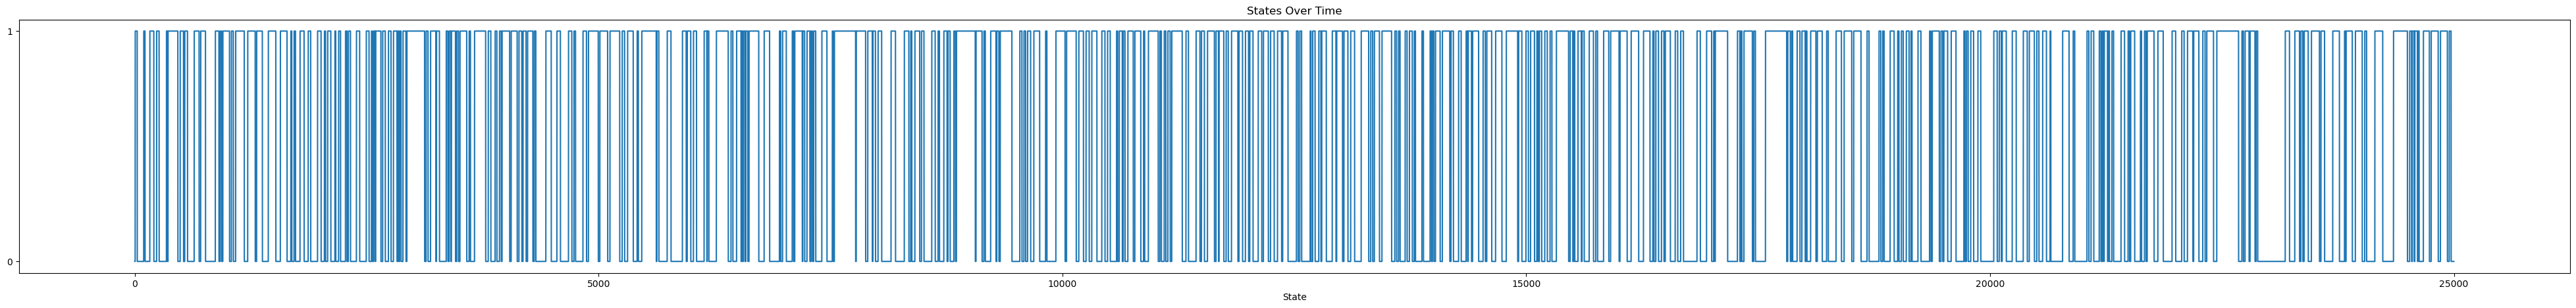

In [67]:
hidden_states = best_model.predict(X_val)
print(f'Predicted states: {hidden_states}')
plt.figure(figsize=(50, 5))
plt.plot(hidden_states)
plt.title('States Over Time')
plt.xlabel('Time (# rolls)')
plt.xlabel('State')
plt.yticks([0, 1])
plt.show()

**What problem in Hidden Markov Models does this task correspond to?**

Ans: The task at hand aligns with the "Decoding Problem" in Hidden Markov Models (HMMs). It entails identifying the most probable sequence of hidden states. In this task switching between fair and loaded dice states, given the observed sequence of emissions or outcomes.

In [68]:
print("Transition Matrix : \n", best_model.transmat_)
print("Emission Matrix : \n", best_model.emissionprob_)


Transition Matrix : 
 [[0.8598741  0.1401259 ]
 [0.13273368 0.86726632]]
Emission Matrix : 
 [[0.11662719 0.12255516 0.10979004 0.09612918 0.10685614 0.44804228]
 [0.15824997 0.15146495 0.16542901 0.17439937 0.17124683 0.17920987]]


# 3.4.3 Part 2

**1. How often do you think the casino is switching out the fair die for the loaded one and vice versa?**

Ans: From the above emission matrix, we can observe that the fair die corresponds to index 1 and index 0 correspondes to loaded die. We can also see in the transition matrix that the probability of going from fair die to loaded die is around 13%.

**2. What problem in Hidden Markov Models does this task correspond to?**

Ans: The above problem corresponds to the Learning problem of HMM.

# 3.4.4 Part 3

**1. How do you think the loaded die is biased?**

Ans: From the emission matrix, we can observe that the fair die has a higher probability of outputting the number 6, that is, P(6 | loaded) = 0.44

**2. What problem in Hidden Markov Models does this task correspond to?**

Ans: The above problem corresponds to the Learning problem of HMM.

# 3.5 Task 4

In [15]:
runs = np.load('./Dataset/runs.npy')

print(runs.any() < 1)
print(runs.any() > 6)

False
False


In [16]:
runs.shape

(30000, 1)

In [17]:
X_train = runs[:25000]
X_val = runs[25000:]
X_train.shape, X_val.shape

((25000, 1), (5000, 1))

In [18]:
def virat_init():
    p = np.random.uniform(0, 1, 7)
    p[1] += 2  # Increase the probability of singles
    p[2] += 2  # Increase the probability of doubles
    p[5] = 0   # Set the probability of 6 to 0
    p = p / np.sum(p)
    return p

def rohit_init():
    p = np.random.uniform(0, 1, 7)
    p[3] += 2  # Increase the probability of scoring 3 runs
    p[4] += 2  # Increase the probability of scoring 4 runs
    p[6] += 2  # Increase the probability of scoring 6 runs
    p[5] = 0   # Set the probability of 6 to 0
    p = p / np.sum(p)
    return p

In [19]:
best_score = None
best_model = None
n_fits = 100

np.random.seed(13)

# Prepare the training data
train_runs = runs[:25000].reshape(-1, 1)
test_runs = runs[25000:].reshape(-1, 1)

for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2,
        init_params='s', algorithm='viterbi', random_state=idx)  

    prob = np.random.uniform(low=0.25, high=0.35)
    model.transmat_ = np.array([[1 - prob, prob], [prob, 1 - prob]])
    model.emissionprob_ = np.array([virat_init(), rohit_init()])
    
    model.fit(X_train)
    score = model.score(X_val)
    print(f'Model: {idx}     Score: {score}')
    
    if best_score is None or score > best_score:
        best_model = model
        best_score = score
        
print(f'Best score : {best_score}')
 

Model: 0     Score: -8520.295598020455
Model: 1     Score: -8521.294435044596
Model: 2     Score: -8522.575617258375
Model: 3     Score: -8519.689069223243
Model: 4     Score: -8520.938857267702
Model: 5     Score: -8522.04548016476
Model: 6     Score: -8513.61067730779
Model: 7     Score: -8520.37544963541
Model: 8     Score: -8522.218644113402
Model: 9     Score: -8512.170411941977
Model: 10     Score: -8516.561311390333
Model: 11     Score: -8519.459904267966
Model: 12     Score: -8514.577023117286
Model: 13     Score: -8516.839998912412
Model: 14     Score: -8516.751499898965
Model: 15     Score: -8517.411515324975
Model: 16     Score: -8517.491245353249
Model: 17     Score: -8520.042422829047
Model: 18     Score: -8512.520961489552
Model: 19     Score: -8520.813463264396
Model: 20     Score: -8513.978668435217
Model: 21     Score: -8514.974297370296
Model: 22     Score: -8517.210578586864
Model: 23     Score: -8513.475757301694
Model: 24     Score: -8519.313035675103
Model: 25    

In [20]:
print("Optimal Transition Matrix:\n", best_model.transmat_)

Optimal Transition Matrix:
 [[0.68303541 0.31696459]
 [0.31752567 0.68247433]]


In [21]:
print("Optimal Emission Matrix:\n", best_model.emissionprob_)

Optimal Emission Matrix:
 [[0.1696237  0.30643374 0.26041642 0.03432191 0.11903032 0.
  0.11017389]
 [0.08101377 0.09176634 0.09406866 0.06114306 0.38858071 0.
  0.28342745]]


In [22]:
print("Optimal Start Probability:\n", best_model.startprob_)

Optimal Start Probability:
 [9.99934184e-01 6.58162788e-05]


In [23]:
batsmen = best_model.predict(runs)

if batsmen[0] == 0:
    first_ball = "Virat"
else:
    first_ball = "Rohit"
    
if batsmen[-1] == 0:
    last_ball = "Virat"
else:
    last_ball = "Rohit"
    
    
print("First Ball:", first_ball)
print("Last Ball:", last_ball)


First Ball: Virat
Last Ball: Rohit
